In [2]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.6 MB 1.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.6 MB 1.7 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.6 MB 1.8 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.6 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/9.6 MB 1.8 MB/s eta 0:00:04
   ------------ --------------------------- 2.9/9.6 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 3.4/9.6 MB 1.9 MB/s eta 0:00:04
   ---------------- ----------------------- 3.9/9.6 MB 1.9 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.6 MB 1.9 MB/s eta 0:00:03
   ------------------- ----------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
history = {
    "2023-01": 1200,
    "2023-02": 1150,
    "2023-03": 1250,
    "2023-04": 1320,
    "2023-05": 1400,
    "2023-06": 1350,
    "2023-07": 1500,
    "2023-08": 1550,
    "2023-09": 1600,
    "2023-10": 1620,
    "2023-11": 1700,
    "2023-12": 1750,
    "2024-01": 1800,
    "2024-02": 1780,
    "2024-03": 1820,
    "2024-04": 1850,
    "2024-05": 1900,
    "2024-06": 1950,
    "2024-07": 2000,
    "2024-08": 2100,
    "2024-09": 2050,
    "2024-10": 2150,
    "2024-11": 2200,
    "2024-12": 2250,
}

In [5]:
df_monthly = pd.Series(history)
df_monthly.index = pd.to_datetime(df_monthly.index)
df_monthly = df_monthly.asfreq("MS")  # ensure monthly frequency
df_monthly.name = "amount"

In [6]:
FORECAST_MONTHS = 12

In [7]:
def baseline_forecast(series, months_out, window=3):
    last_mean = series.rolling(window=window).mean().iloc[-1]
    idx = pd.date_range(start=series.index[-1] + pd.offsets.MonthBegin(1),
                        periods=months_out, freq="MS")
    return pd.Series([last_mean]*months_out, index=idx)

baseline_pred = baseline_forecast(df_monthly, FORECAST_MONTHS, window=3)

In [8]:
order = (1,1,1)
seasonal_order = (1,1,1,12)
sarimax_model = SARIMAX(df_monthly, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
sarimax_res = sarimax_model.fit(disp=False)
sarimax_forecast = sarimax_res.get_forecast(steps=FORECAST_MONTHS)
sarimax_pred = sarimax_forecast.predicted_mean
sarimax_ci = sarimax_forecast.conf_int(alpha=0.05)

c:\Users\Chitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


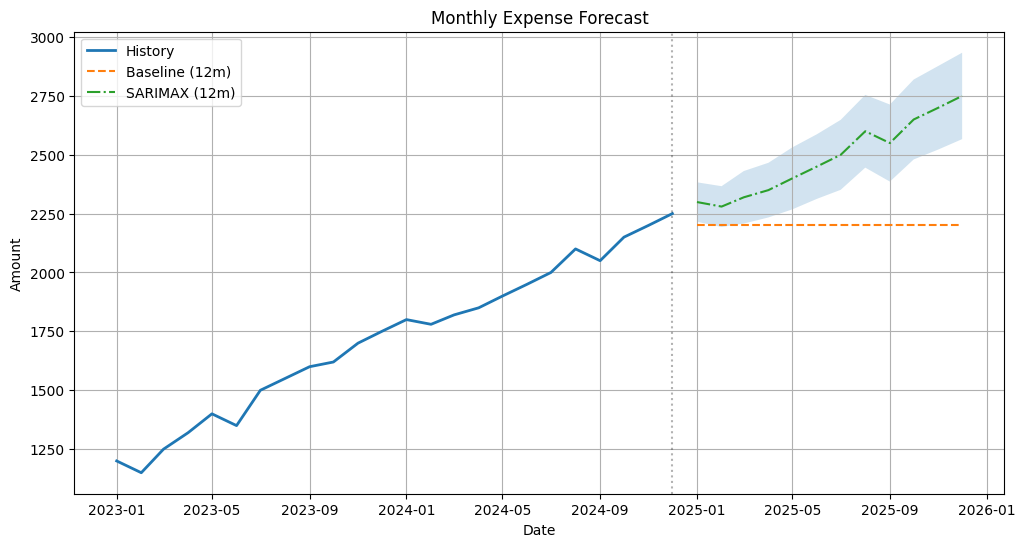

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly.values, label="History", linewidth=2)
plt.plot(baseline_pred.index, baseline_pred.values, "--", label=f"Baseline ({FORECAST_MONTHS}m)")
plt.plot(sarimax_pred.index, sarimax_pred.values, "-.", label=f"SARIMAX ({FORECAST_MONTHS}m)")
plt.fill_between(sarimax_ci.index, sarimax_ci.iloc[:,0], sarimax_ci.iloc[:,1], alpha=0.2)
plt.axvline(df_monthly.index[-1], color="k", alpha=0.3, linestyle=":")
plt.title("Monthly Expense Forecast")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
results = pd.DataFrame({
    "baseline": baseline_pred,
    "sarimax": sarimax_pred
})
print("\nForecast Table:")
print(results.round(2))


Forecast Table:
            baseline  sarimax
2025-01-01    2200.0  2298.99
2025-02-01    2200.0  2279.78
2025-03-01    2200.0  2319.16
2025-04-01    2200.0  2349.65
2025-05-01    2200.0  2399.27
2025-06-01    2200.0  2449.57
2025-07-01    2200.0  2499.33
2025-08-01    2200.0  2599.52
2025-09-01    2200.0  2549.37
2025-10-01    2200.0  2649.48
2025-11-01    2200.0  2699.40
2025-12-01    2200.0  2749.47
